In [19]:
from random import randint, random, sample
from termcolor import colored, cprint
import numpy as np
import matplotlib.pyplot as plt

def criar_array_de_teia():
    # Criar uma versão 61x61 da teia de aranha
    size = 31
    matrix_large = np.zeros((size, size), dtype=int)
    center = size // 2
    
    for i in range(size):
        # Linhas verticais e horizontais
        matrix_large[center][i] = 1
        matrix_large[i][center] = 1
        # Diagonais
        matrix_large[i][i] = 1
        matrix_large[i][size - i - 1] = 1
    
    # Adicionando "círculos" (contornos concêntricos) para parecer mais com uma teia
    for radius in range(4, center, 4):
        for angle in np.linspace(0, 2 * np.pi, 360):
            x = int(center + radius * np.cos(angle))
            y = int(center + radius * np.sin(angle))
            if 0 <= x < size and 0 <= y < size:
                matrix_large[y][x] = 1

    # Transformar a matriz 2D em uma lista unidimensional
    flat_list = matrix_large.flatten().tolist()
    return flat_list

def gerar_populacao_inicial_aleatoria(TOTAL_DE_INDIVIDUOS, TOTAL_DE_GENES):
    '''
    Retorna uma lista de listas, onde cada lista representa um indivíduo da população
    '''
    populacao = []
    for i in range(TOTAL_DE_INDIVIDUOS):
        individuo = [randint(0,1) for i in range(TOTAL_DE_GENES)]
        populacao.append(individuo)

    return populacao

def calcular_distancia_de_hamming(vetor_alvo, vetor_individuo):
    '''
    Retorna um número inteiro com o valor da distância de hamming entre um vetor alvo e um vetor indivíduo
    '''
    distancia = 0
    for alvo, individuo in zip(vetor_alvo, vetor_individuo):
        if alvo != individuo:
            distancia += 1

    return distancia

def gerar_vetor_de_distancias_hamming(populacao):
    '''
    Retorna uma lista contendo as distâcias de hamming para cada indivíduo da população
    '''
    vetor_de_distancias = []
    for individuo in populacao:
        distancia = calcular_distancia_de_hamming(BITSTRING_ALVO, individuo)
        vetor_de_distancias.append(distancia)
    return vetor_de_distancias

def gerar_vetor_de_aptidao(vetor_distancia_hamming):
    '''
    Retorna uma lista contendo os valores de aptidão de cada indivíduo da população
    '''
    vetor_de_aptidao = []
    for distancia in vetor_distancia_hamming:
        aptidao = TOTAL_DE_GENES - distancia
        vetor_de_aptidao.append(aptidao)
    return vetor_de_aptidao

def gerar_intervalo_da_roleta(vetor_de_aptidao):
    '''
    Retorna uma lista com os intervalos que cada indivíduo da população ocupa na roleta de seleção
    '''
    soma_das_aptidoes = sum(vetor_de_aptidao)
    #print('soma das aptidoes: ', soma_das_aptidoes)
    intervalos = []
    somas_parciais = 0 
    for aptidao in vetor_de_aptidao:
        graus = (aptidao * 360) / soma_das_aptidoes
        somas_parciais += graus
        #print(graus, somas_parciais)
        intervalos.append(float(somas_parciais))

    return intervalos

def gerar_vetores_numeros_roleta():
    '''
    Retorna uma lista com os numeros sorteados na roleta
    '''
    numeros_sorteados = []
    for i in range(TOTAL_DE_INDIVIDUOS):
        numero = randint(1,360)
        numeros_sorteados.append(numero)

    return numeros_sorteados

def salvar_geracao_em_dicionario(num_geracao):
    '''
    Popula o dicionario de geracoes com seus individuos, aptidoes e outros atributos
    '''
    num_geracao = str(num_geracao)
    dicionario_de_geracoes[num_geracao] = {}
    dicionario_de_geracoes[num_geracao]['pop'] = populacao
    dicionario_de_geracoes[num_geracao]['dist'] = vetor_distancia_hamming
    
    dicionario_de_geracoes[num_geracao]['apt'] = vetor_de_aptidao
    
    dicionario_de_geracoes[num_geracao]['inter_roleta'] = intervalo_roleta
    dicionario_de_geracoes[num_geracao]['media'] = sum(dicionario_de_geracoes[num_geracao]['apt']) / len(dicionario_de_geracoes[num_geracao]['apt'])
    
    dicionario_de_geracoes[num_geracao]['mais_apto'] = max(dicionario_de_geracoes[num_geracao]['apt'])

    indice_do_mais_apto = dicionario_de_geracoes[num_geracao]['apt'].index(dicionario_de_geracoes[num_geracao]['mais_apto'])
    ind_mais_apto = dicionario_de_geracoes[num_geracao]['pop'][indice_do_mais_apto]

    dicionario_de_geracoes[num_geracao]['ind_mais_apto'] = ind_mais_apto

    lista_inter_minimo = []
    lista_inter_maximo = []
    for i in range(len(intervalo_roleta)):
        if i == 0:
            intervalo_min = 0
        else:
            intervalo_min = intervalo_roleta[i-1]
        
        intervalo_max = intervalo_roleta[i]

        lista_inter_minimo.append(round(intervalo_min))
        lista_inter_maximo.append(round(intervalo_max))

    dicionario_de_geracoes[num_geracao]['min'] = lista_inter_minimo
    dicionario_de_geracoes[num_geracao]['max'] = lista_inter_maximo

    #print(f"Média da população {num_geracao}: {dicionario_de_geracoes[num_geracao]['media']}")
    #print(f"Melhor aptidão da população {num_geracao}: {dicionario_de_geracoes[num_geracao]['mais_apto']}")

def selecionar_individuos_na_roleta(numeros_sorteados, dicionario_de_geracoes, num_geracao):
    '''
    Retorna uma lista com os individuos escolhidos na roleta
    '''
    individuos_selecionados = []
    for sorteado in numeros_sorteados:
        intervalos_minimos = dicionario_de_geracoes[num_geracao]['min']
        intervalos_maximos = dicionario_de_geracoes[num_geracao]['max']
        populacoes = dicionario_de_geracoes[num_geracao]['pop']
        for min, max, individuo in zip(intervalos_minimos, intervalos_maximos, populacoes):
            if sorteado > min and sorteado <= max:
                #cprint(f'{min} - {max} {individuo} {sorteado} --> escolhido', 'green')
                individuos_selecionados.append(individuo)
            #else:
                #print(min, ' - ',max, individuo, sorteado)
        #print(50 * '*')

    #for selecionado in individuos_selecionados:
    #    print('SELECIONADO: ', selecionado)

    #print('Total de selecionados: ', len(individuos_selecionados))
    return individuos_selecionados

def selecionar_por_torneio(populacao, N=3):
    '''
    Retorna uma lista de indivíduos selecionados por torneio
    n = 3 por padrão
    '''
    vencedores_selecionados = []
    N = COMPETIDORES_POR_TORNEIO
    #print(f'Selecionando por torneio com N={N}')

    for i in range(TOTAL_DE_INDIVIDUOS):
        #print(f'Torneio {i}')
        competidores = sample(populacao, N)
        notas_dos_competidores = []
        for competidor in competidores:
            nota = TOTAL_DE_GENES - calcular_distancia_de_hamming(BITSTRING_ALVO, competidor)

            notas_dos_competidores.append(nota)
            #print('competidor: ', competidor, ' nota: ', nota)

        indice_do_maior = notas_dos_competidores.index(max(notas_dos_competidores)) #arg max
        vencedor = competidores[indice_do_maior]
        #print('vencedor: ', vencedor)
        vencedores_selecionados.append(vencedor)
        #print(20*'=')

    #print('Total de vencedores: ', len(vencedores_selecionados))
    return vencedores_selecionados


def reproduzir_individuos_selecionados(individuos_selecionados):
    '''
    Retorna uma lista contendo os indivíduos da nova população
    '''
    nova_populacao = []
    for i in range(0, len(individuos_selecionados), 2):

        #print(' ')
        pares_de_acasalamento = individuos_selecionados[i:i+2]
        #print(f'Par de acasalamento {i}')

        individuo_pai = pares_de_acasalamento[0]
        #print(colored(individuo_pai, 'green'))

        if len(pares_de_acasalamento) == 2:
        
            individuo_mae = pares_de_acasalamento[1]
            #print(colored(individuo_mae, 'red'))

            numero_aleatorio_0_1 = random()

            #print('numero aleatorio 0-1: ', numero_aleatorio_0_1)
            if numero_aleatorio_0_1 <= PROBABILIDADE_CROSSSING_OVER:
                #Realizar cruzamento
                #print('Realizando cruzamento')
                ponto_do_crossing_over = randint(1, TOTAL_DE_GENES - 1)
                #print('Ponto Crossing Over: ', ponto_do_crossing_over)

                filho_1 = individuo_pai[:ponto_do_crossing_over] + individuo_mae[ponto_do_crossing_over:]
                filho_2 = individuo_mae[:ponto_do_crossing_over] + individuo_pai[ponto_do_crossing_over:]

                #print('filho 1: ', colored(individuo_pai[:ponto_do_crossing_over],'green'), colored(individuo_mae[ponto_do_crossing_over:],'red'))
                #print('filho 2: ', colored(individuo_mae[:ponto_do_crossing_over],'red'), colored(individuo_pai[ponto_do_crossing_over:],'green'))

                #Adicionando os filhos na próxima geração
                nova_populacao.append(filho_1)
                nova_populacao.append(filho_2)

            else:
                #Pais originais são repetidos na próxima geração
                #print('Não realizando o cruzamento')
                nova_populacao.append(individuo_pai)
                nova_populacao.append(individuo_mae)

        else:
            #Se pai não tiver mãe para acasalar, repetir pai
            #print('Pai solteiro')
            nova_populacao.append(individuo_pai)        
        
        #print(20 * '#')

    #print('NOVA POPULACAO')
    #for i, individuo in enumerate(nova_populacao):
    #    print(f'INDIVIDUO {i}: {individuo}')
    return nova_populacao

def aplicar_mutacao_na_populacao(populacao):
    '''
    Aplica uma mutação na populacao de acordo com uma probabilidade e retorna uma lista com os novos indivíduos 
    '''
    populacao_mutada = []
    individuo_mutado = []
    for individuo in populacao:
        for gene in individuo:
            numero_aleatorio_0_1 = random()
            if numero_aleatorio_0_1 <= PROBABILIDADE_MUTACAO:
                #Aplicar mutacao
                #print('Aplicando mutacao')
                if gene == 0:
                    gene = 1
                else:
                    gene = 0 
            individuo_mutado.append(gene)
        populacao_mutada.append(individuo_mutado)
        individuo_mutado = []
    
    #print('')
    #print('POPULACAO_MUTADA')
    #for i, individuo in enumerate(populacao_mutada):
    #    print(f'Individuo {i}: {individuo}')

    return populacao_mutada

TOTAL_DE_INDIVIDUOS = 200
PROBABILIDADE_CROSSSING_OVER = 0.8
PROBABILIDADE_MUTACAO = 0.01
BITSTRING_ALVO = CROMOSSOMO_ALVO = criar_array_de_teia()
TOTAL_DE_GENES = len(BITSTRING_ALVO)
TOTAL_DE_GERACOES = 1000
COMPETIDORES_POR_TORNEIO = 10
METODO_DE_SELECAO = 'competicao' #roleta ou competicao

dicionario_de_geracoes = {}
melhores_individuos = []
melhores_top_9 = []
melhores_da_geracao = []
for i in range(TOTAL_DE_GERACOES):
    #print('')
    #cprint(f'******************** Populacao {i} ********************', 'green', 'on_red')
    #print('')

    if i == 0:
        #print('População gerada aleatoriamente')
        populacao = gerar_populacao_inicial_aleatoria(TOTAL_DE_INDIVIDUOS, TOTAL_DE_GENES)
    else:
        #print('População anterior mutada')
        populacao = populacao_mutada

    #for i_ind, ind in enumerate(populacao):
    #    print(f'individuo {i_ind}: {ind}')
    #print('')
    #print('')

    numero_da_geracao = str(i)

    vetor_distancia_hamming = gerar_vetor_de_distancias_hamming(populacao)

    #print(colored(f'Cromossomo alvo: {BITSTRING_ALVO}', 'red'))
    #print(f'Distâncias de hamming: {vetor_distancia_hamming}')

    #Calculando as aptidões dos indivíduos da população
    vetor_de_aptidao = gerar_vetor_de_aptidao(vetor_distancia_hamming)
    #print(colored(f'Vetor de aptidão: {vetor_de_aptidao}', 'green'))

    x_melhor = 0
    y_melhor = 0
    for ind, apt in zip(populacao, vetor_de_aptidao):
        if apt > y_melhor:
            y_melhor = apt
            x_melhor = ind

    melhores_individuos.append(x_melhor)

    populacao_copia = populacao.copy()
    vetor_de_aptidao_copia = vetor_de_aptidao.copy()
    

    for i in range(9):
        indice_do_maior = vetor_de_aptidao_copia.index(max(vetor_de_aptidao_copia)) #arg max
        vetor_de_aptidao_copia.pop(indice_do_maior)
        melhor = populacao_copia.pop(indice_do_maior)
        melhores_top_9.append(melhor)

    melhores_da_geracao.append(melhores_top_9)
    melhores_top_9 = []

    #print('')

    intervalo_roleta = gerar_intervalo_da_roleta(vetor_de_aptidao)
    numeros_sorteados = gerar_vetores_numeros_roleta()
    #print(colored(f'Numeros sorteados: {numeros_sorteados}', 'magenta'))
    #print(' ')

    #Salvando e avaliando a população
    salvar_geracao_em_dicionario(numero_da_geracao)

    if y_melhor == TOTAL_DE_GENES:
        #Significa que encontrou o indivíduo mais apto
        break

    
    #Para seleção por competição
    if METODO_DE_SELECAO == 'competicao':
        individuos_selecionados = selecionar_por_torneio(populacao)
    elif METODO_DE_SELECAO == 'roleta':
        individuos_selecionados = selecionar_individuos_na_roleta(numeros_sorteados, dicionario_de_geracoes, numero_da_geracao)

    #individuos_selecionados = selecionar_individuos_na_roleta(numeros_sorteados, dicionario_de_geracoes, numero_da_geracao)
    nova_populacao = reproduzir_individuos_selecionados(individuos_selecionados)
    populacao_mutada = aplicar_mutacao_na_populacao(nova_populacao)

    if i % 100 == 0:
        COMPETIDORES_POR_TORNEIO += 20


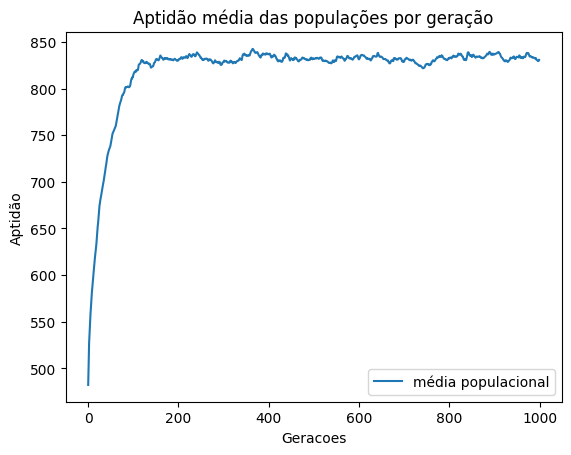

In [20]:
x = geracoes = [int(i) for i in list(dicionario_de_geracoes.keys())]
y1 = medias = [dicionario_de_geracoes[str(xi)]['media'] for xi in x]
y2 = mais_aptos = [dicionario_de_geracoes[str(xi)]['mais_apto'] for xi in x]

plt.plot(x, y1, label='média populacional')
#plt.plot(x, y2, label='indivíduo mais apto')
plt.xlabel('Geracoes')
plt.ylabel('Aptidão')

plt.title(f'Aptidão média das populações por geração')
plt.legend()
#plt.plot(x,y2,'-.')

plt.show()

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os

contador_frames = 1
images = []
CAMINHO_PARA_SALVAR_GIF = 'C:/Dados/Computação_Inspirada_pela_Natureza/genetic_gif' #Pasta onde o GIF será salvo
NOME_GIF = 'genetico.gif'

#Descomente as linhas abaixo para salvar o GIF
'''
for geracao in range(len(melhores_da_geracao)):
    #criando a grid de imagens
    fig, axs = plt.subplots(3,3, figsize=(5, 5))

    axs[0, 0].imshow(np.array(melhores_da_geracao[geracao][0]).reshape(31,31))
    axs[0, 1].imshow(np.array(melhores_da_geracao[geracao][1]).reshape(31,31))
    axs[0, 2].imshow(np.array(melhores_da_geracao[geracao][2]).reshape(31,31))
    axs[1, 0].imshow(np.array(melhores_da_geracao[geracao][3]).reshape(31,31))
    axs[1, 1].imshow(np.array(melhores_da_geracao[geracao][4]).reshape(31,31))
    axs[1, 2].imshow(np.array(melhores_da_geracao[geracao][5]).reshape(31,31))
    axs[2, 0].imshow(np.array(melhores_da_geracao[geracao][6]).reshape(31,31))
    axs[2, 1].imshow(np.array(melhores_da_geracao[geracao][7]).reshape(31,31))
    axs[2, 2].imshow(np.array(melhores_da_geracao[geracao][8]).reshape(31,31))

    fig.suptitle(f'Geração {geracao + 1}', fontsize=15)

    #desabilitando os eixos x e y das imagens
    for i in range(3):
        for j in range(3):
            axs[i,j].axis('off')


    frame = os.path.join(CAMINHO_PARA_SALVAR_GIF, f'frame_{contador_frames}.png')
    fig.savefig(frame)
    images.append(imageio.imread(frame))

    contador_frames += 1
    
imageio.mimsave(os.path.join(CAMINHO_PARA_SALVAR_GIF, NOME_GIF), images, fps=30)
'''

"\nfor geracao in range(len(melhores_da_geracao)):\n    #criando a grid de imagens\n    fig, axs = plt.subplots(3,3, figsize=(5, 5))\n\n    axs[0, 0].imshow(np.array(melhores_da_geracao[geracao][0]).reshape(31,31))\n    axs[0, 1].imshow(np.array(melhores_da_geracao[geracao][1]).reshape(31,31))\n    axs[0, 2].imshow(np.array(melhores_da_geracao[geracao][2]).reshape(31,31))\n    axs[1, 0].imshow(np.array(melhores_da_geracao[geracao][3]).reshape(31,31))\n    axs[1, 1].imshow(np.array(melhores_da_geracao[geracao][4]).reshape(31,31))\n    axs[1, 2].imshow(np.array(melhores_da_geracao[geracao][5]).reshape(31,31))\n    axs[2, 0].imshow(np.array(melhores_da_geracao[geracao][6]).reshape(31,31))\n    axs[2, 1].imshow(np.array(melhores_da_geracao[geracao][7]).reshape(31,31))\n    axs[2, 2].imshow(np.array(melhores_da_geracao[geracao][8]).reshape(31,31))\n\n    fig.suptitle(f'Geração {geracao + 1}', fontsize=15)\n\n    #desabilitando os eixos x e y das imagens\n    for i in range(3):\n        for 

In [23]:
#Exibindo o melhor individuo da populacao em relacao ao alvo
'''
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os

contador_frames = 1
images = []
CAMINHO_PARA_SALVAR_GIF = 'C:/Dados/Computação_Inspirada_pela_Natureza/genetic_gif'
NOME_GIF = 'genetico.gif'

for i, ind in enumerate(melhores_individuos):
    if i % 5 == 0:
        fig, axs = plt.subplots(1,2, figsize=(20, 10))
        
        individuo = np.array(ind).reshape(31,31)
        
        teia = np.array(BITSTRING_ALVO).reshape(31,31)
        
        axs[0].set_title('Individuo', fontsize=19)
        axs[0].imshow(individuo)
        axs[1].set_title('Alvo', fontsize=19)
        axs[1].imshow(teia)
    
        fig.suptitle(f'\nGeração {contador_frames}', fontsize=25)
    
        
        frame = os.path.join(CAMINHO_PARA_SALVAR_GIF, f'frame_{contador_frames}.png')
        fig.savefig(frame)
        images.append(imageio.imread(frame))
        


    contador_frames += 1


#imageio.mimsave(os.path.join(CAMINHO_PARA_SALVAR_GIF, NOME_GIF), images, loop=0, fps=30)
imageio.mimsave(os.path.join(CAMINHO_PARA_SALVAR_GIF, NOME_GIF), images, fps=40)
'''

"\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport imageio\nimport os\n\ncontador_frames = 1\nimages = []\nCAMINHO_PARA_SALVAR_GIF = 'C:/Dados/Computação_Inspirada_pela_Natureza/genetic_gif'\nNOME_GIF = 'genetico.gif'\n\nfor i, ind in enumerate(melhores_individuos):\n    if i % 5 == 0:\n        fig, axs = plt.subplots(1,2, figsize=(20, 10))\n        \n        individuo = np.array(ind).reshape(31,31)\n        \n        teia = np.array(BITSTRING_ALVO).reshape(31,31)\n        \n        axs[0].set_title('Individuo', fontsize=19)\n        axs[0].imshow(individuo)\n        axs[1].set_title('Alvo', fontsize=19)\n        axs[1].imshow(teia)\n    \n        fig.suptitle(f'\nGeração {contador_frames}', fontsize=25)\n    \n        \n        frame = os.path.join(CAMINHO_PARA_SALVAR_GIF, f'frame_{contador_frames}.png')\n        fig.savefig(frame)\n        images.append(imageio.imread(frame))\n        \n\n\n    contador_frames += 1\n\n\n#imageio.mimsave(os.path.join(CAMINHO_PARA_SALVAR_GI